# Exploratory Data Analysis

In [2]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

In [3]:
# # Get the data
# df1 = pd.read_csv("olddata/firstbatch_500Samples.csv")
# df2 = pd.read_csv("olddata/secondbatch_500Samples.csv")
# df=pd.concat([df1,df2])]
df=pd.read_csv("Cleaned_data.csv")

In [4]:
df.head()

,Snelheid,Omvang1,Positie1,Omvang2,Positie2,Relatie,Speed
0,5.0,30.0,-75.0,45.0,30.0,-60.0,0.277917
1,5.0,30.0,-60.0,60.0,-15.0,-75.0,0.765214
2,5.0,30.0,-45.0,45.0,15.0,-90.0,0.120006
3,5.0,30.0,-30.0,45.0,-60.0,45.0,1.500826
4,5.0,30.0,-30.0,45.0,-30.0,45.0,0.377644


In [5]:
# data=df.drop(columns=['Unnamed: 0'])
data=df

In [6]:
data.head()

,Snelheid,Omvang1,Positie1,Omvang2,Positie2,Relatie,Speed
0,5.0,30.0,-75.0,45.0,30.0,-60.0,0.277917
1,5.0,30.0,-60.0,60.0,-15.0,-75.0,0.765214
2,5.0,30.0,-45.0,45.0,15.0,-90.0,0.120006
3,5.0,30.0,-30.0,45.0,-60.0,45.0,1.500826
4,5.0,30.0,-30.0,45.0,-30.0,45.0,0.377644


In [7]:
summary_stats = data.describe()
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df


,Snelheid,Omvang1,Positie1,Omvang2,Positie2,Relatie,Speed
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,7.029979,44.839400,-6.552463,45.160600,-4.946467,-11.017131,0.643077
std,1.407811,12.252963,42.088693,12.213494,43.898626,59.128903,0.417038
min,5.000000,30.000000,-75.000000,30.000000,-75.000000,-90.000000,0.078040
25%,6.000000,30.000000,-45.000000,30.000000,-45.000000,-60.000000,0.395298
50%,7.000000,45.000000,0.000000,45.000000,0.000000,-30.000000,0.544514
75%,8.000000,60.000000,30.000000,60.000000,30.000000,45.000000,0.775960
max,9.000000,60.000000,60.000000,60.000000,60.000000,75.000000,2.805840


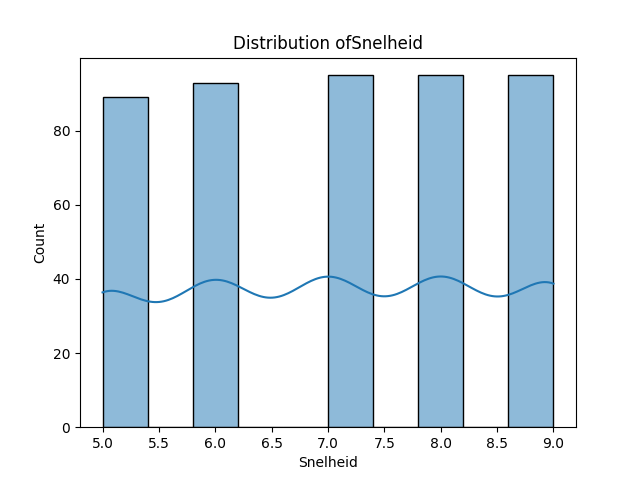

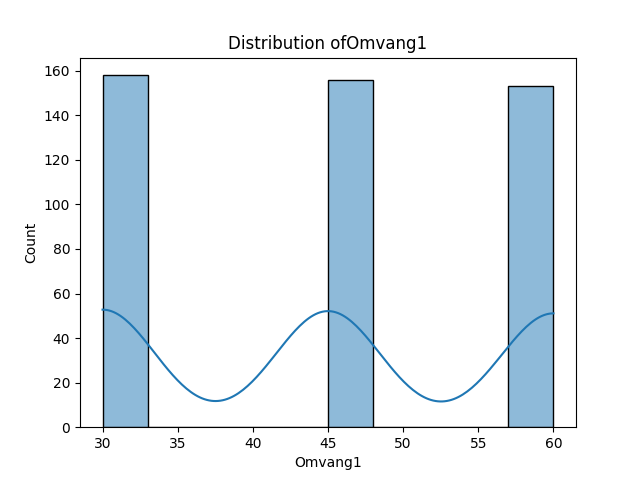

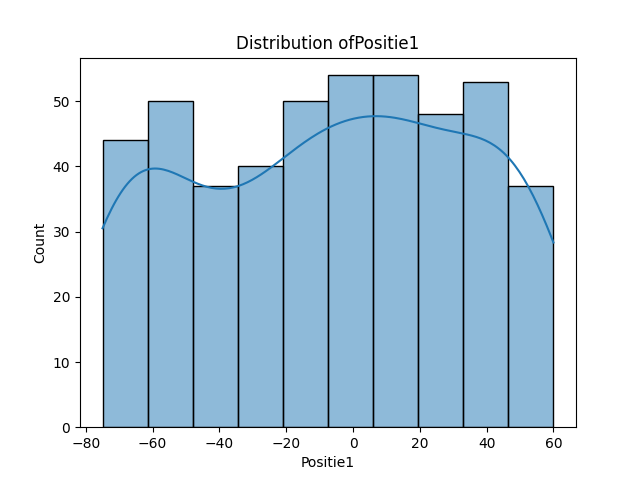

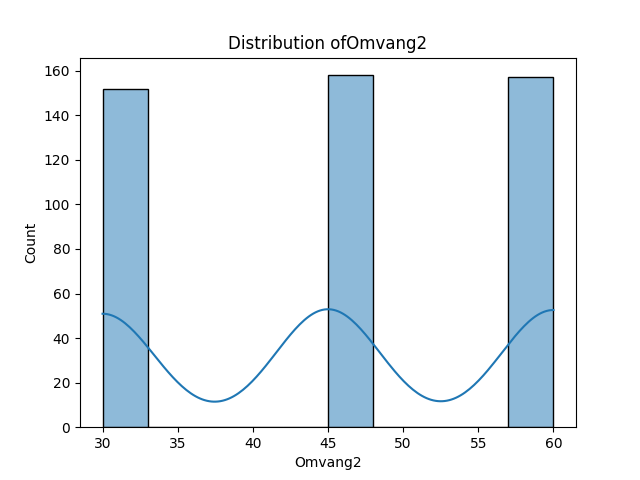

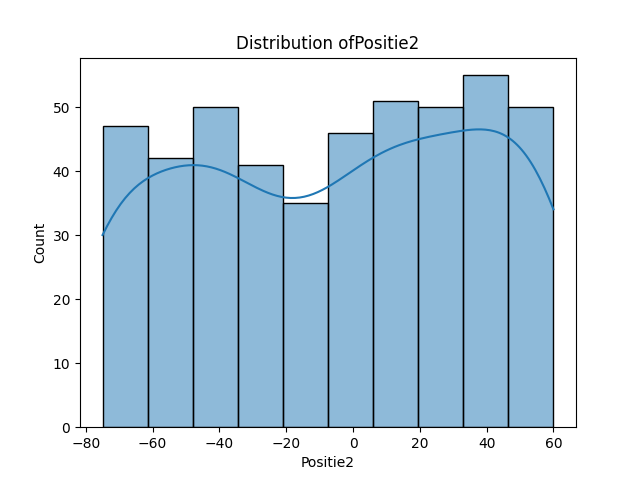

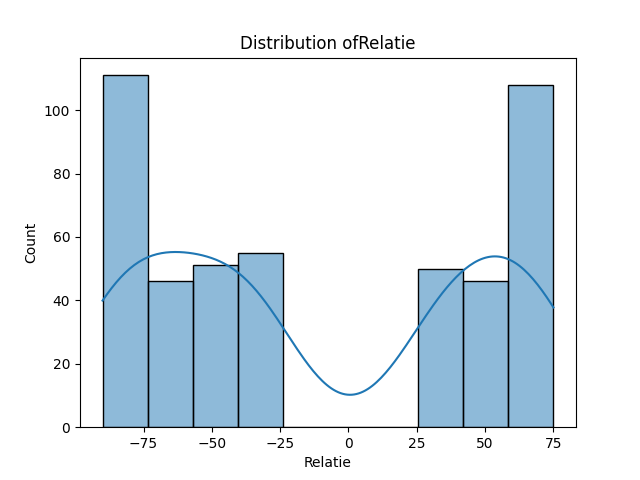

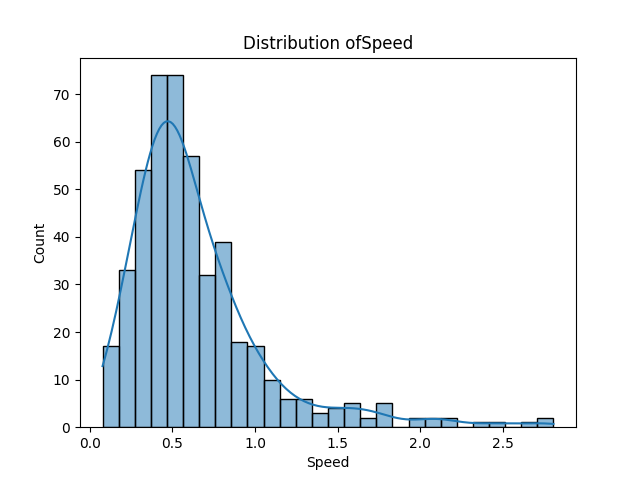

In [8]:
# Plotting individual variables
for col in data.columns:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title('Distribution of' + col)
    plt.show()

In [9]:
# Pairwise relationships and correlations
# plt.figure()
# sns.pairplot(data)
# plt.show()

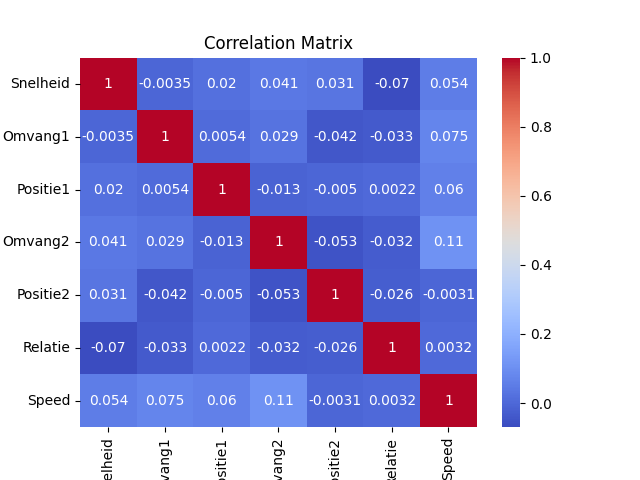

In [10]:
# Correlation matrix
plt.figure()
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

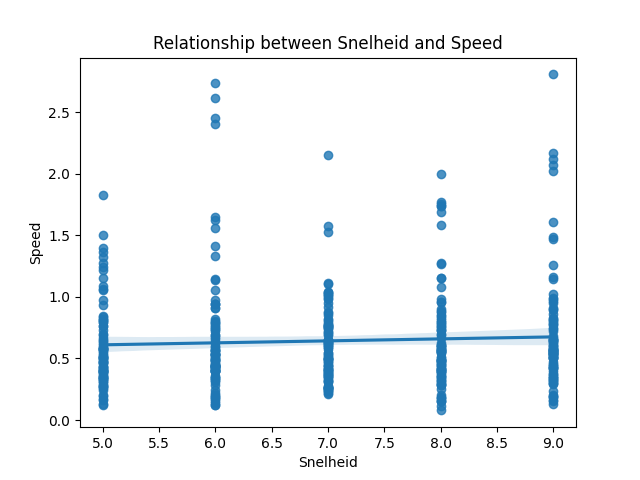

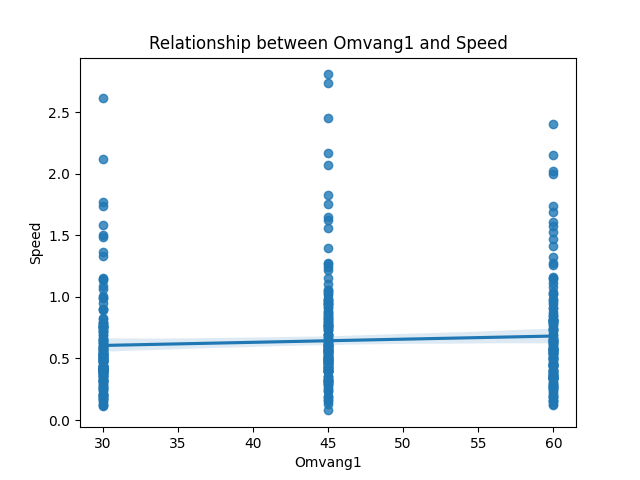

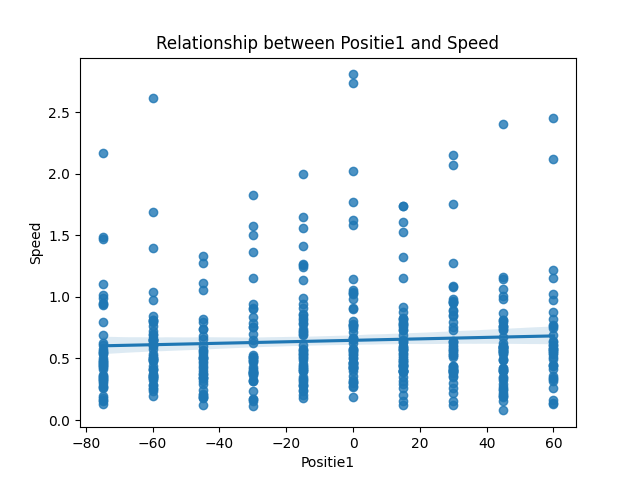

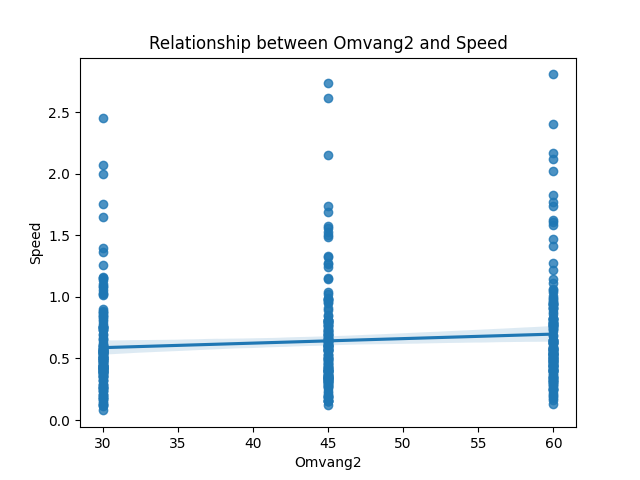

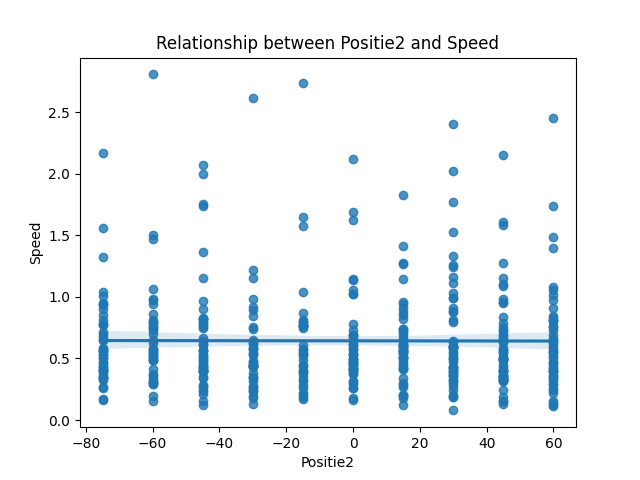

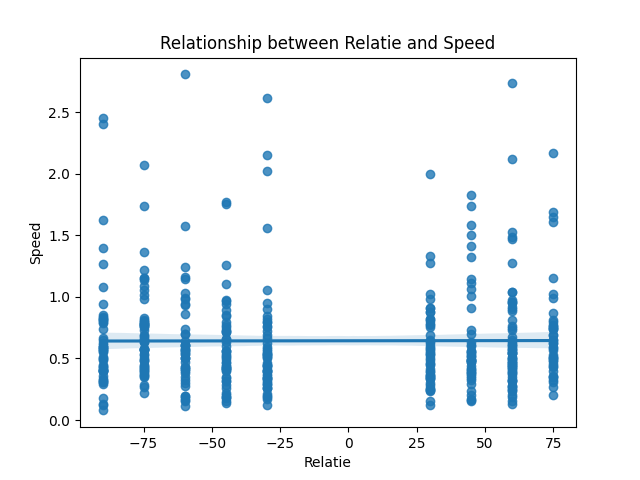

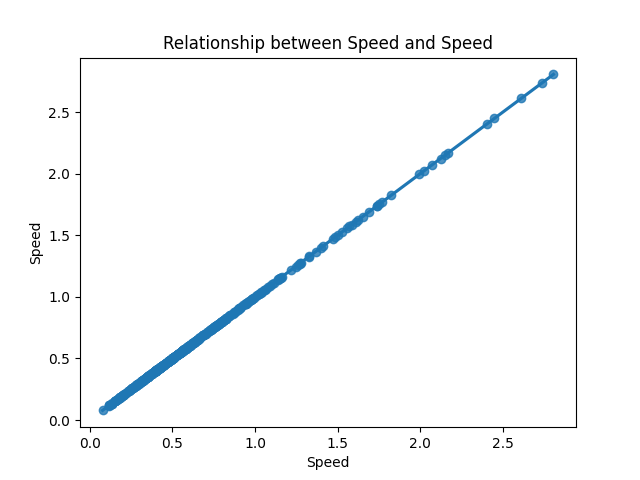

In [11]:
# Plotting relationship between variables and Speed
for col in data.columns:
    plt.figure()
    sns.regplot(x=col, y='Speed', data=data)
    plt.title('Relationship between ' + col + ' and Speed')
    plt.show()

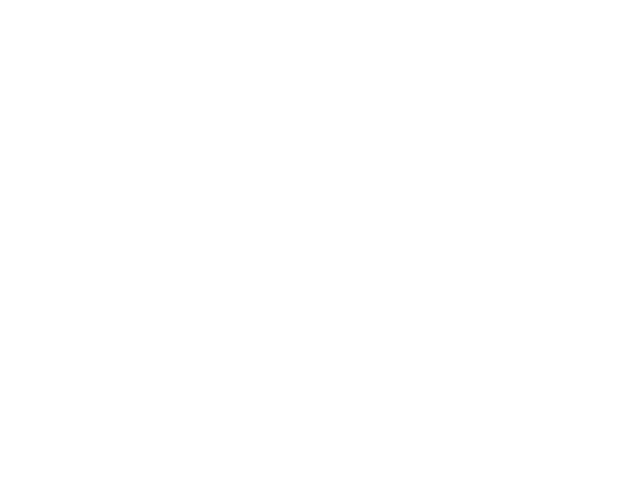

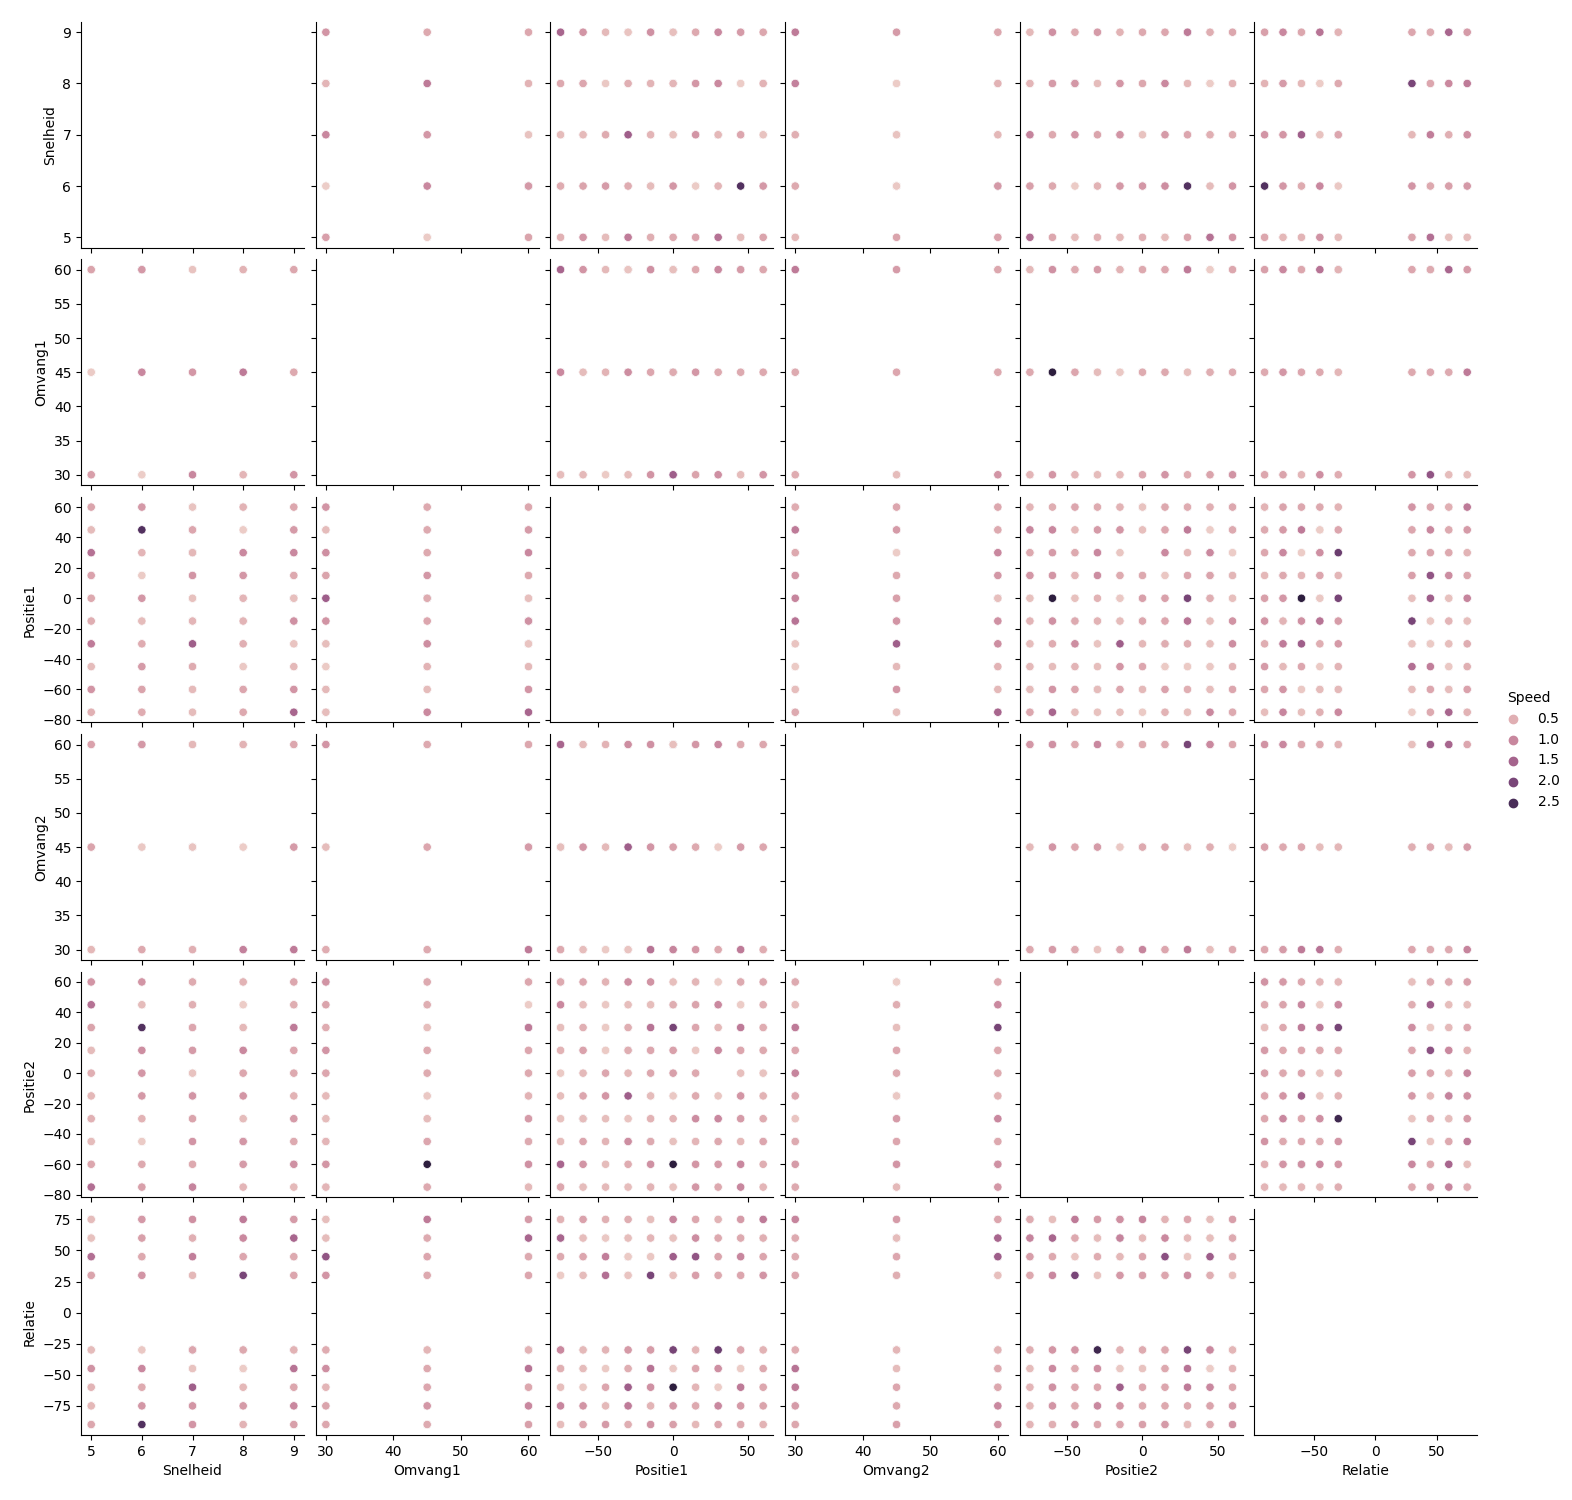

In [12]:
# # pairwise plot with omvang1 and omvang2 and speed as hue
plt.figure()
sns.pairplot(data, hue='Speed')

In [13]:
data[data['Speed']>3]

,Snelheid,Omvang1,Positie1,Omvang2,Positie2,Relatie,Speed


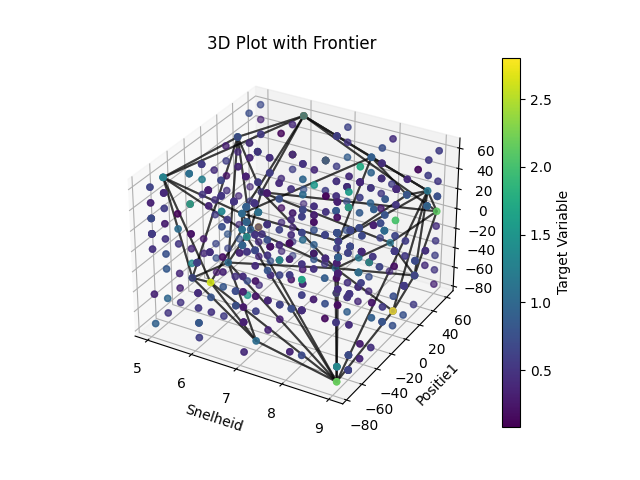

In [14]:
from scipy.spatial import ConvexHull
data.head()
display_dimensions=['Snelheid','Positie1','Positie2']
target = data[['Speed']]  # Target variable
dimensions = data[display_dimensions]  # Dimensions
#convert dimensions to numpy array
dimensions = dimensions.to_numpy()
target = target.to_numpy()
filtered_Data=data[data['Speed']>1]
filtered_Data_dimensions=filtered_Data[display_dimensions]
filtered_Data_dimensions=filtered_Data_dimensions.to_numpy()
filtered_Data_target=filtered_Data[['Speed']]
filtered_Data_target=filtered_Data_target.to_numpy()
hull = ConvexHull(filtered_Data_dimensions)
# Frontier points
frontier = np.random.randn(50, 3)[0]

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(dimensions[:, 0], dimensions[:, 1], dimensions[:, 2], c=target)

for s in hull.simplices:
    s = np.append(s, s[0])  # Close the loop
    ax.plot3D(filtered_Data_dimensions[s, 0], filtered_Data_dimensions[s, 1], filtered_Data_dimensions[s, 2], 'k-', alpha=0.5)

# Customize the plot
ax.set_xlabel(display_dimensions[0])
ax.set_ylabel(display_dimensions[1])
ax.set_zlabel(display_dimensions[2])
ax.set_title('3D Plot with Frontier')
plt.colorbar(ax.scatter(dimensions[:, 0], dimensions[:, 1], dimensions[:, 2], c=target), label='Target Variable')

# Show the plot
plt.show()

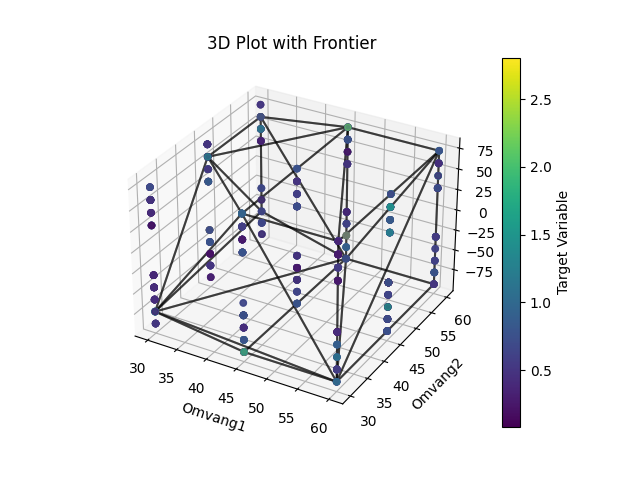

In [15]:
from scipy.spatial import ConvexHull
data.head()
display_dimensions=['Omvang1','Omvang2','Relatie']
target = data[['Speed']]  # Target variable
dimensions = data[display_dimensions]  # Dimensions
#convert dimensions to numpy array
dimensions = dimensions.to_numpy()
target = target.to_numpy()
filtered_Data=data[data['Speed']>1]
filtered_Data_dimensions=filtered_Data[display_dimensions]
filtered_Data_dimensions=filtered_Data_dimensions.to_numpy()
filtered_Data_target=filtered_Data[['Speed']]
filtered_Data_target=filtered_Data_target.to_numpy()
hull = ConvexHull(filtered_Data_dimensions)
# Frontier points
frontier = np.random.randn(50, 3)[0]

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(dimensions[:, 0], dimensions[:, 1], dimensions[:, 2], c=target)

for s in hull.simplices:
    s = np.append(s, s[0])  # Close the loop
    ax.plot3D(filtered_Data_dimensions[s, 0], filtered_Data_dimensions[s, 1], filtered_Data_dimensions[s, 2], 'k-', alpha=0.5)

# Customize the plot
ax.set_xlabel(display_dimensions[0])
ax.set_ylabel(display_dimensions[1])
ax.set_zlabel(display_dimensions[2])
ax.set_title('3D Plot with Frontier')
plt.colorbar(ax.scatter(dimensions[:, 0], dimensions[:, 1], dimensions[:, 2], c=target), label='Target Variable')

# Show the plot
plt.show()